In [67]:
import os

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
FOLDER = 'Logs'
files = os.listdir(FOLDER)

#headings = list(filter(lambda x: 'headings' in x and not 'old' in x, files))
headings = list(filter(lambda x: 'headings' in x, files))
headings_csv = [pd.read_csv(os.path.join(FOLDER, x)) for x in headings]

#positions = list(filter(lambda x: 'position' in x and not 'old' in x, files))
positions = list(filter(lambda x: 'position' in x, files))
positions_csv = [pd.read_csv(os.path.join(FOLDER, x)) for x in positions]

In [69]:
headings

['RTI_Class_headings_JorgeP_26_M_2.csv',
 'RTI_Class_headings_Cesc_25_M_0.csv',
 'RTI_Class_headings_DavidF_25_M_0.csv',
 'RTI_Class_headings_Alex_26_M_0.csv',
 'RTI_Class_headings_SmrtSapiens_23_M_0.csv',
 'RTI_Class_headings_Aldo_35_M_1.csv',
 'RTI_Class_headings_Aarushi_26_F_1.csv',
 'RTI_Class_headings_Alex_24_M_0.csv',
 'RTI_Class_headings_Carlos_32_M_1.csv',
 'RTI_Class_headings_Javier_24_M_2_old.csv',
 'RTI_Class_headings_Maja_26_F_2_old.csv',
 'RTI_Class_headings_Tapa_20_M_2_old.csv',
 'RTI_Class_headings_JuanT_18_M_1.csv',
 'RTI_Class_headings_Sara_23_F_0.csv',
 'RTI_Class_headings_Carolina_28_F_2_old.csv',
 'RTI_Class_headings_Maud_31_F_1.csv',
 'RTI_Class_headings_NataliaM_25_F_0.csv',
 'RTI_Class_headings_SergioR_26_M_2.csv',
 'RTI_Class_headings_Alejandre_27_M_1.csv',
 'RTI_Class_headings_SpaceMike_26_M_2.csv',
 'RTI_Class_headings_DavidL_23_M_2.csv']

In [70]:
positions

['RTI_Class_positions_JuanT_18_M_1.csv',
 'RTI_Class_positions_Cesc_25_M_0.csv',
 'RTI_Class_positions_Alex_26_M_0.csv',
 'RTI_Class_positions_SergioR_26_M_2.csv',
 'RTI_Class_positions_Carolina_28_F_2_old.csv',
 'RTI_Class_positions_Javier_24_M_2_old.csv',
 'RTI_Class_positions_Aldo_35_M_1.csv',
 'RTI_Class_positions_DavidL_23_M_2.csv',
 'RTI_Class_positions_Alex_24_M_0.csv',
 'RTI_Class_positions_DavidF_25_M_0.csv',
 'RTI_Class_positions_Maja_26_F_2_old.csv',
 'RTI_Class_positions_Tapa_20_M_2_old.csv',
 'RTI_Class_positions_JorgeP_26_M_2.csv',
 'RTI_Class_positions_Sara_23_F_0.csv',
 'RTI_Class_positions_Carlos_32_M_1.csv',
 'RTI_Class_positions_Maud_31_F_1.csv',
 'RTI_Class_positions_SmrtSapiens_23_M_0.csv',
 'RTI_Class_positions_NataliaM_25_F_0.csv',
 'RTI_Class_positions_Aarushi_26_F_1.csv',
 'RTI_Class_positions_Alejandre_27_M_1.csv',
 'RTI_Class_positions_SpaceMike_26_M_2.csv']

1 --> 37.8430996501672


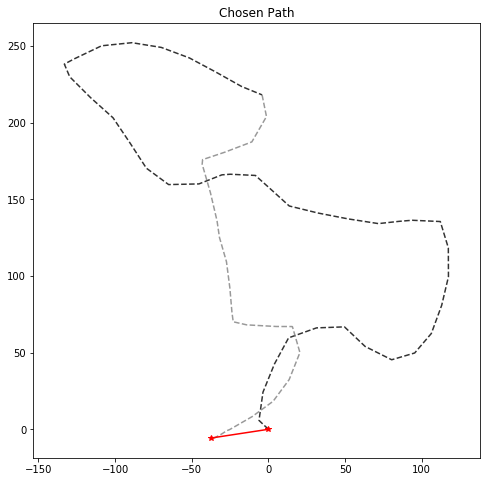

In [71]:
types = []
errs = []
times = []
times_return = []

ls_dict = {'0': 'solid',
           '1': '--',
           '2': '-.'}

color_dict = {'0': 'red',
              '1': 'red',
              '2': 'red'}

plt.figure(figsize=(8, 8))
plt.axis('equal')
for h, name in zip(positions_csv[-6:-5], positions[-6:-5]):
    h = h.dropna(axis=0)
    split_idx = h[h.progress == 0].index[-1] +3

    exp_type = name.replace('_old', '').split('_')[-1].replace('.csv', '')
    time = h['time'].iloc[-1]
    return_time = h.time.iloc[-1] - h.loc[split_idx].time
    
    
    plt.plot(h.iloc[:split_idx].x,
             h.iloc[:split_idx].z,
             c='k', ls=ls_dict[exp_type], alpha=0.8, label='Finding')
    plt.plot(h.iloc[split_idx:].x,
             h.iloc[split_idx:].z,
             c='grey', ls=ls_dict[exp_type], alpha=0.8, label='Homing')
    
    x0 = h.x.iloc[0]
    x1 = h.x.iloc[-1]
    
    z0 = h.z.iloc[0]
    z1 = h.z.iloc[-1]
    
    error = np.sqrt(np.power(x1 - x0, 2) + \
                np.power(z1- z0, 2))
    
    plt.plot([x0, x1], [z0, z1], c=color_dict[exp_type], marker='*')
    
    print(exp_type, '-->', error)
    
    types.append(exp_type)
    errs.append(error)
    times.append(time)
    times_return.append(return_time)
plt.title('Chosen Path')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
#plt.legend(by_label.values(), by_label.keys())
#plt.legend()

1 --> 53.817543446215566
0 --> 43.60917207687507
0 --> 214.4282264751542
2 --> 8.576839329172547
2 --> 9.089353351335738
2 --> 21.611198077291412
1 --> 14.630140384330424
2 --> 30.356682774231114
0 --> 24.456273631792392
0 --> 135.51806356000517
2 --> 21.134936857227387
2 --> 36.64804988779894
2 --> 9.743194955678348
0 --> 8.647260890207084
1 --> 23.46074872156873
1 --> 37.8430996501672
0 --> 42.71427780651921
0 --> 147.94648624624378
1 --> 57.331455917267235
1 --> 50.4615072543077
2 --> 21.265124123935887


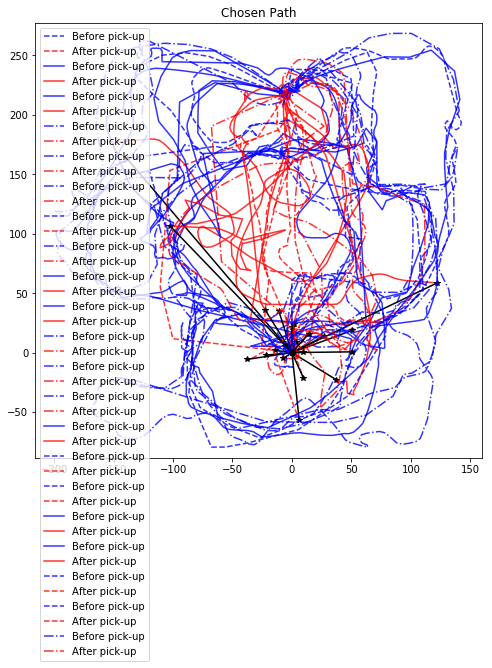

In [72]:
types = []
errs = []
times = []
times_return = []

ls_dict = {'0': 'solid',
           '1': '--',
           '2': '-.'}

color_dict = {'0': 'k',
              '1': 'k',
              '2': 'k'}

plt.figure(figsize=(8, 8))
plt.axis('equal')
for h, name in zip(positions_csv[:], positions[:]):
    h = h.dropna(axis=0)
    split_idx = h[h.progress == 0].index[-1] +3

    exp_type = name.replace('_old', '').split('_')[-1].replace('.csv', '')
    time = h['time'].iloc[-1]
    return_time = h.time.iloc[-1] - h.loc[split_idx].time
    
    
    plt.plot(h.iloc[:split_idx].x,
             h.iloc[:split_idx].z,
             c='blue', ls=ls_dict[exp_type], alpha=0.8, label='Before pick-up')
    plt.plot(h.iloc[split_idx:].x,
             h.iloc[split_idx:].z,
             c='red', ls=ls_dict[exp_type], alpha=0.8, label='After pick-up')
    
    x0 = h.x.iloc[0]
    x1 = h.x.iloc[-1]
    
    z0 = h.z.iloc[0]
    z1 = h.z.iloc[-1]
    
    error = np.sqrt(np.power(x1 - x0, 2) + \
                np.power(z1- z0, 2))
    
    plt.plot([x0, x1], [z0, z1], c=color_dict[exp_type], marker='*')
    
    print(exp_type, '-->', error)
plt.title('Chosen Path')
plt.legend()

1 --> 53.817543446215566
0 --> 43.60917207687507
0 --> 214.4282264751542
2 --> 8.576839329172547
2 --> 9.089353351335738
2 --> 21.611198077291412
1 --> 14.630140384330424
2 --> 30.356682774231114
0 --> 24.456273631792392
0 --> 135.51806356000517
2 --> 21.134936857227387
2 --> 36.64804988779894


/Users/pablot/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/pablot/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/pablot/anaconda3/lib/python3.7/site-packages/matplotl

2 --> 9.743194955678348
0 --> 8.647260890207084
1 --> 23.46074872156873
1 --> 37.8430996501672
0 --> 42.71427780651921
0 --> 147.94648624624378
1 --> 57.331455917267235
1 --> 50.4615072543077
2 --> 21.265124123935887


/Users/pablot/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/pablot/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Users/pablot/anaconda3/lib/python3.7/site-packages/matplotl

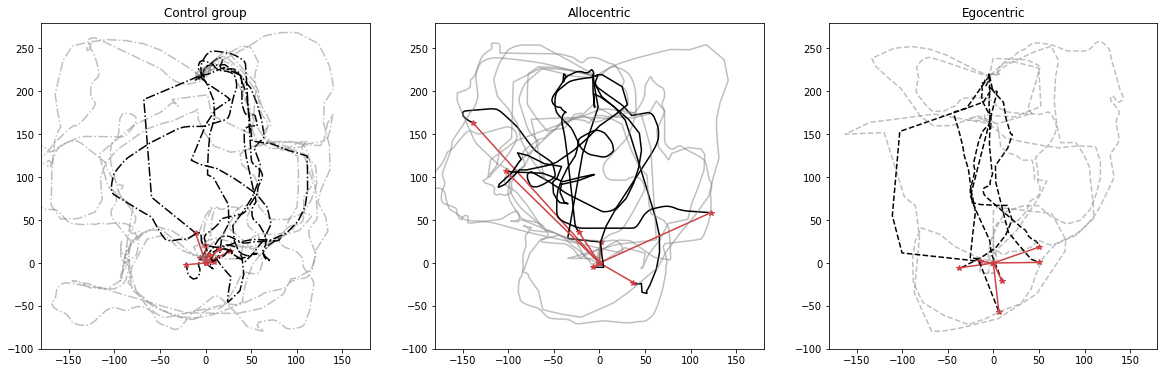

In [73]:
plt.figure(figsize=(20, 6))
plt.axis('equal')

color_dict = {'0': '#cf4144',
              '1': '#cf4144',
              '2': '#cf4144'}

for h, name in zip(positions_csv[:], positions[:]):
    h = h.dropna(axis=0)
    split_idx = h[h.progress == 0].index[-1] +3

    exp_type = name.replace('_old', '').split('_')[-1].replace('.csv', '')
    time = h['time'].iloc[-1]
    return_time = h.time.iloc[-1] - h.loc[split_idx].time

    if exp_type == '2':
        plt.subplot(131)
        plt.title('Control group')
    if exp_type == '0':
        plt.subplot(132)
        plt.title('Allocentric')
    if exp_type == '1':
        plt.subplot(133)
        plt.title('Egocentric')
    
    plt.xlim(-180, 180)
    plt.ylim(-100, 280)
    
    plt.plot(h.iloc[:split_idx].x,
             h.iloc[:split_idx].z,
             c='grey', ls=ls_dict[exp_type], alpha=0.5)
    plt.plot(h.iloc[split_idx:].x,
             h.iloc[split_idx:].z,
             c='k', ls=ls_dict[exp_type], alpha=1)
    
    x0 = h.x.iloc[0]
    x1 = h.x.iloc[-1]
    
    z0 = h.z.iloc[0]
    z1 = h.z.iloc[-1]
    
    error = np.sqrt(np.power(x1 - x0, 2) + \
                np.power(z1- z0, 2))
    
    plt.plot([x0, x1], [z0, z1], c=color_dict[exp_type], marker='*')
    
    print(exp_type, '-->', error)
    
    types.append(exp_type)
    errs.append(error)
    times.append(time)
    times_return.append(return_time)
#plt.title('Chosen Path')
#plt.legend()

1 --> 53.817543446215566
0 --> 43.60917207687507
0 --> 214.4282264751542
2 --> 8.576839329172547
2 --> 9.089353351335738
2 --> 21.611198077291412
1 --> 14.630140384330424
2 --> 30.356682774231114
0 --> 24.456273631792392


/Users/pablot/anaconda3/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


0 --> 135.51806356000517
2 --> 21.134936857227387
2 --> 36.64804988779894
2 --> 9.743194955678348
0 --> 8.647260890207084
1 --> 23.46074872156873
1 --> 37.8430996501672
0 --> 42.71427780651921
0 --> 147.94648624624378
1 --> 57.331455917267235
1 --> 50.4615072543077
2 --> 21.265124123935887


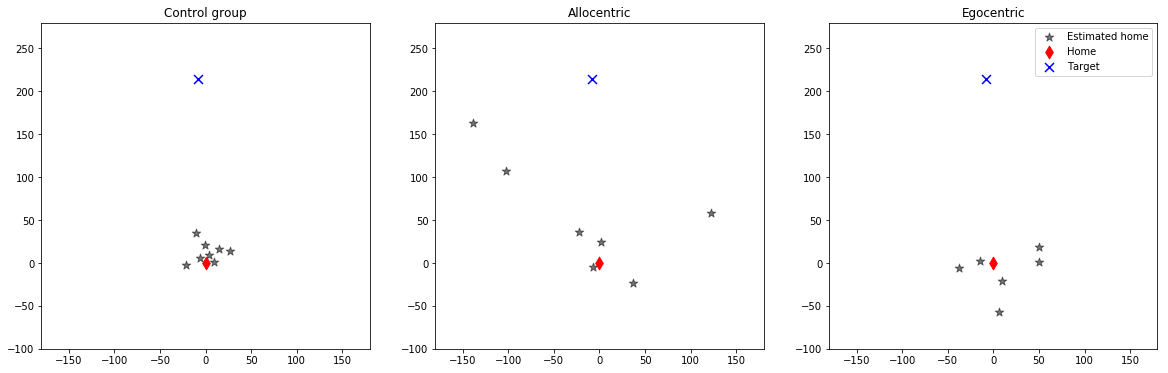

In [74]:
plt.figure(figsize=(20, 6))
plt.axis('equal')

for h, name in zip(positions_csv[:], positions[:]):
    h = h.dropna(axis=0)
    split_idx = h[h.progress == 0].index[-1] +3

    exp_type = name.replace('_old', '').split('_')[-1].replace('.csv', '')
    time = h['time'].iloc[-1]
    return_time = h.time.iloc[-1] - h.loc[split_idx].time

    if exp_type == '2':
        plt.subplot(131)
        plt.title('Control group')
    if exp_type == '0':
        plt.subplot(132)
        plt.title('Allocentric')
    if exp_type == '1':
        plt.subplot(133)
        plt.title('Egocentric')
    
    plt.xlim(-180, 180)
    plt.ylim(-100, 280)
    
    x0 = h.x.iloc[0]
    x1 = h.x.iloc[-1]
    
    z0 = h.z.iloc[0]
    z1 = h.z.iloc[-1]
    
    error = np.sqrt(np.power(x1 - x0, 2) + \
                np.power(z1- z0, 2))
    plt.scatter([x1], [z1], s=80, c='#00000088', marker='*', label='Estimated home')
    
    
    print(exp_type, '-->', error)

plt.subplot(131)
plt.scatter(x0, z0, marker='d', s=80, c='red', label='Home')
plt.scatter(h.iloc[split_idx].x, h.iloc[split_idx].z, s=80, c='blue', marker='x', label='Target')
plt.subplot(132)
plt.scatter(x0, z0, marker='d', s=80, c='red', label='Home')
plt.scatter(h.iloc[split_idx].x, h.iloc[split_idx].z, s=80, c='blue', marker='x', label='Target')
plt.subplot(133)
plt.scatter(x0, z0, marker='d', s=80, c='red', label='Home')
plt.scatter(h.iloc[split_idx].x, h.iloc[split_idx].z, s=80, c='blue', marker='x', label='Target')
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
#plt.title('Chosen Path')
#plt.legend()

In [75]:
results = pd.DataFrame(np.array([types, errs, times, times_return]).astype(np.float32).T,
                       columns=['group', 'err', 'time', 'return_times'])

In [76]:
results.groupby('group').count()

,err,time,return_times
group,,,
0.0,7,7,7
1.0,6,6,6
2.0,8,8,8


In [77]:
results.groupby('group')['time'].mean()

group
0.0    102.223679
1.0     94.026306
2.0    104.948723
Name: time, dtype: float32

In [78]:
results.groupby('group')['return_times'].mean()

group
0.0    39.657143
1.0    38.797009
2.0    34.076805
Name: return_times, dtype: float32

In [79]:
results.groupby('group')['return_times'].std()

group
0.0    19.008877
1.0    16.543501
2.0     6.124413
Name: return_times, dtype: float32

In [80]:
results.groupby('group')['err'].mean()

group
0.0    88.188538
1.0    39.590748
2.0    19.803173
Name: err, dtype: float32

In [81]:
results.groupby('group')['err'].std()

group
0.0    77.665306
1.0    17.444603
2.0    10.311754
Name: err, dtype: float32

In [82]:
from scipy.stats import f_oneway, normaltest

In [98]:
type_ = 'return_times'

e0 = results[results['group']==0][type_]
e1 = results[results['group']==1][type_]
e2 = results[results['group']==2][type_]
#print(normaltest(e0))
#print(normaltest(e1))
#print(normaltest(e2))

print(f_oneway(e0, e1, e2))

F_onewayResult(statistic=0.3208771635630208, pvalue=0.729577653766197)


In [84]:
e1 = results[results['group']==1]

In [85]:
from scipy.stats import pearsonr

In [90]:
pearsonr(results['return_times'], results['err'])

(0.40007274892083183, 0.07233331341612877)

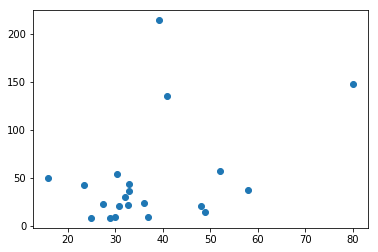

In [91]:
plt.scatter(results['return_times'], results['err'])

In [92]:
e1

,group,err,time,return_times
0,1.0,53.817543,54.183830,30.381491
6,1.0,14.630140,167.984604,49.000599
14,1.0,23.460749,55.996891,27.404421
15,1.0,37.843102,107.994698,58.003250
18,1.0,57.331455,119.998001,52.006351
19,1.0,50.461506,57.999802,15.985930


In [93]:
results

,group,err,time,return_times
0,1.0,53.817543,54.183830,30.381491
1,0.0,43.609173,84.992508,32.988461
2,0.0,214.428223,58.784901,39.188709
3,2.0,8.576839,55.000011,29.011570
4,2.0,9.089354,150.983795,36.996300
5,2.0,21.611198,64.986214,32.787601
6,1.0,14.630140,167.984604,49.000599
7,2.0,30.356682,108.600601,31.996189
8,0.0,24.456274,135.995407,36.004799
9,0.0,135.518066,130.205597,41.017521


In [94]:
e0

1     32.988461
2     39.188709
8     36.004799
9     41.017521
13    25.003611
16    23.383869
17    80.013031
Name: return_times, dtype: float32

{'whiskers': [<matplotlib.lines.Line2D at 0x121398d68>,
 'caps': [<matplotlib.lines.Line2D at 0x12139e438>,
 'boxes': [<matplotlib.lines.Line2D at 0x121398940>,
 'medians': [<matplotlib.lines.Line2D at 0x12139eac8>,
 'fliers': [<matplotlib.lines.Line2D at 0x12139ee10>,
 'means': []}

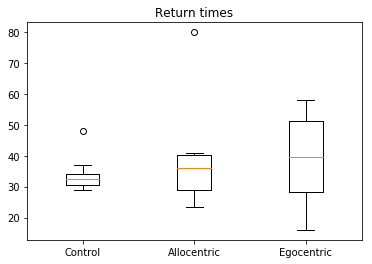

In [99]:
plt.title('Return times')
plt.boxplot([e2, e0, e1], labels=['Control', 'Allocentric', 'Egocentric'])

In [100]:
type_ = 'err'

e0 = results[results['group']==0][type_]
e1 = results[results['group']==1][type_]
e2 = results[results['group']==2][type_]
#print(normaltest(e0))
#print(normaltest(e1))
#print(normaltest(e2))

print(f_oneway(e0, e1, e2))

F_onewayResult(statistic=4.233358340134311, pvalue=0.03112805108022989)


{'whiskers': [<matplotlib.lines.Line2D at 0x13538d710>,
 'caps': [<matplotlib.lines.Line2D at 0x13538dda0>,
 'boxes': [<matplotlib.lines.Line2D at 0x13538d2e8>,
 'medians': [<matplotlib.lines.Line2D at 0x135394470>,
 'fliers': [<matplotlib.lines.Line2D at 0x1353947b8>,
 'means': []}

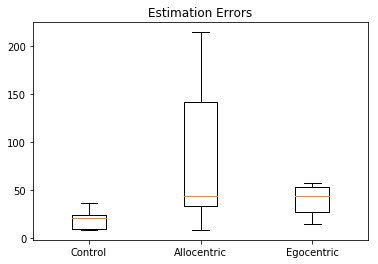

In [101]:
plt.title('Estimation Errors')
plt.boxplot([e2, e0, e1], labels=['Control', 'Allocentric', 'Egocentric'])

In [102]:
e0

1      43.609173
2     214.428223
8      24.456274
9     135.518066
13      8.647261
16     42.714279
17    147.946487
Name: err, dtype: float32

In [103]:
print(e2.mean())
print(e0.mean())
print(e1.mean())

19.803171157836914
88.18852996826172
39.59074783325195


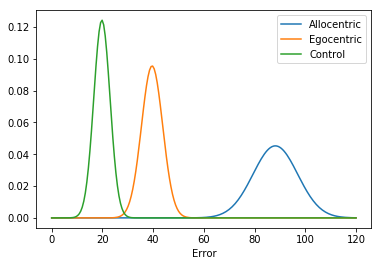

In [104]:
import math
from scipy import stats
for e, n in zip([e0, e1, e2], ['Allocentric', 'Egocentric', 'Control']):
    mu = e.mean()
    variance = e.std()
    sigma = math.sqrt(variance)
    x = np.linspace(0, 120, 200)
    plt.plot(x, stats.norm.pdf(x, mu, sigma), label=n)
plt.xlabel('Error')
plt.legend()

In [105]:
e0

1      43.609173
2     214.428223
8      24.456274
9     135.518066
13      8.647261
16     42.714279
17    147.946487
Name: err, dtype: float32

In [106]:
e1

0     53.817543
6     14.630140
14    23.460749
15    37.843102
18    57.331455
19    50.461506
Name: err, dtype: float32

In [107]:
e2

3      8.576839
4      9.089354
5     21.611198
7     30.356682
10    21.134937
11    36.648048
12     9.743195
20    21.265123
Name: err, dtype: float32

In [108]:
from scipy.stats import ttest_ind, wilcoxon, mannwhitneyu

In [109]:
mannwhitneyu(e0.iloc[1:], e1.iloc[1:])

MannwhitneyuResult(statistic=10.0, pvalue=0.20565689588812947)

In [110]:
mannwhitneyu

<function scipy.stats.stats.mannwhitneyu(x, y, use_continuity=True, alternative=None)>

In [111]:
results.groupby('group').count()

,err,time,return_times
group,,,
0.0,7,7,7
1.0,6,6,6
2.0,8,8,8


In [112]:
h = headings_csv[8]

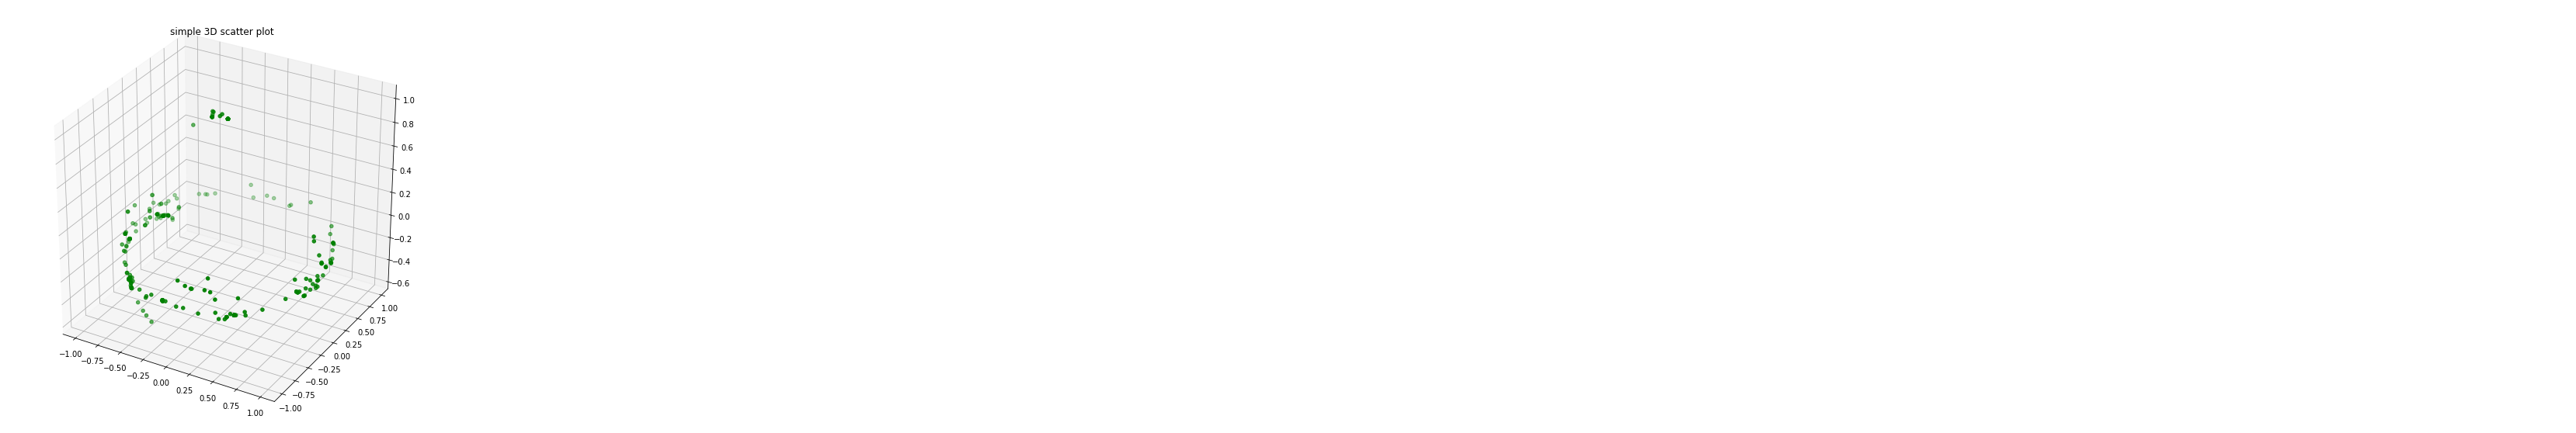

In [113]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt
 
# Creating figure
fig = plt.figure(figsize = (10, 10))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(h.z, h.x, h.y, color = "green")
plt.title("simple 3D scatter plot")
 
# show plot
plt.show()

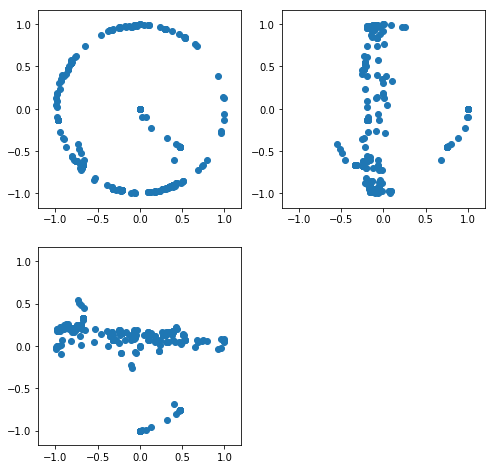

In [114]:
lim = 1.2
plt.figure(figsize=(8, 8))
plt.subplot(222)
plt.axis('equal')
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
plt.scatter(h.y, h.z)
plt.subplot(221)
plt.axis('equal')
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
plt.scatter(h.x, h.z)
plt.subplot(223)
plt.axis('equal')
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)
plt.scatter(h.x, -h.y)

In [115]:
def cart_to_spherical(x, y, z):
    theta = np.arctan(np.sqrt(x**2 + y**2)/z)
    phi = np.arctan2(y, x)
    return theta, phi

In [116]:
theta, phi = cart_to_spherical(h.x, h.z, h.y)

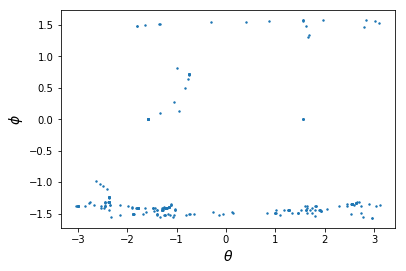

In [117]:
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$\phi$', fontsize=14)

plt.scatter(phi, theta, s=2)

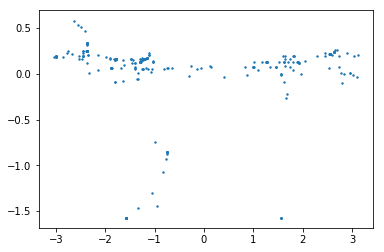

In [118]:
plt.scatter(phi, (theta+np.pi/2+np.pi/2) % np.pi - np.pi/2, s=2)

In [119]:
theta2 = (theta+np.pi/2+np.pi/2) % np.pi - np.pi/2
theta2 = theta2.append(pd.Series([-np.pi/2, np.pi/2]))
phi = phi.append(pd.Series([-np.pi, np.pi]))

In [120]:
def myplot(x, y, s, bins=300):
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)
    margin = 0
    extent = [xedges[0]-margin, xedges[-1]+margin, yedges[0]-margin, yedges[-1]+margin]
    return heatmap.T, extent

Text(0.5, 1.0, 'Heading distribution')

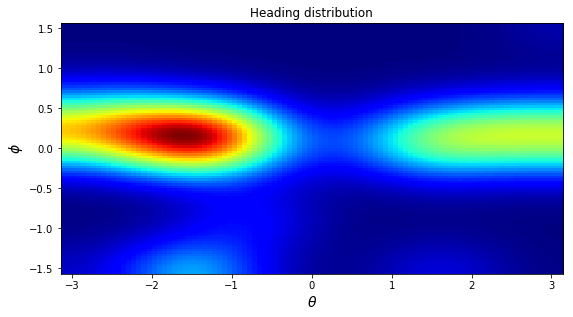

In [121]:
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter
from scipy import stats

img, extent = myplot(phi, theta2, 10, bins=100)
plt.figure(figsize=(9, 5))
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$\phi$', fontsize=14)

plt.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
plt.title('Heading distribution')

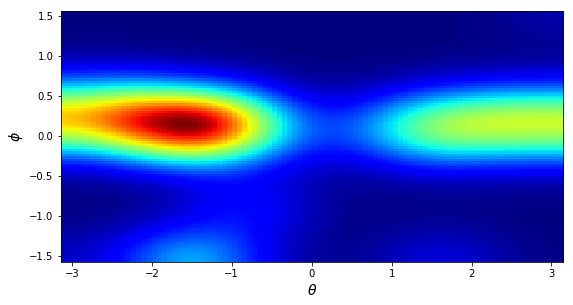

In [122]:
import matplotlib.cm as cm
from scipy.ndimage.filters import gaussian_filter
from scipy import stats

img, extent = myplot(phi, theta2, 10, bins=100)
plt.figure(figsize=(9, 5))
plt.xlabel(r'$\theta$', fontsize=14)
plt.ylabel(r'$\phi$', fontsize=14)

plt.imshow(img, extent=extent, origin='lower', cmap=cm.jet)

In [123]:
def spherical2cart(p, t):
    x = np.cos(t)*np.sin(p)
    y = np.sin(t)*np.sin(p)
    z = np.cos(p)
    return x, y, z

In [124]:
len(np.linspace(extent[0], extent[1], 500))

500

In [125]:
stats.entropy(img.ravel())

8.538266443826005

In [126]:
def calculate_entropy(x, y, z, bins=300, s=40):
    t, p = cart_to_spherical(x, y, z)
    heatmap, xedges, yedges = np.histogram2d(x, y, bins=bins)
    heatmap = gaussian_filter(heatmap, sigma=s)
    return stats.entropy(heatmap.ravel())

2 ---> 11.053743486861343


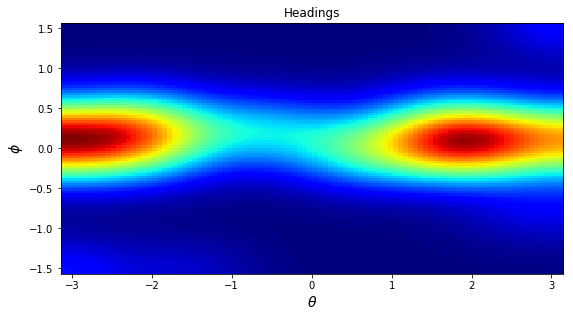

0 ---> 11.093781055381527


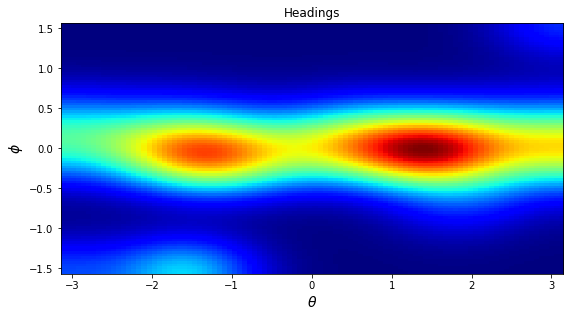

0 ---> 11.229111246021585


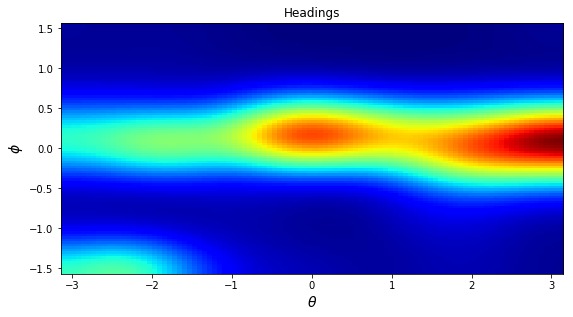

0 ---> 11.205994900282475


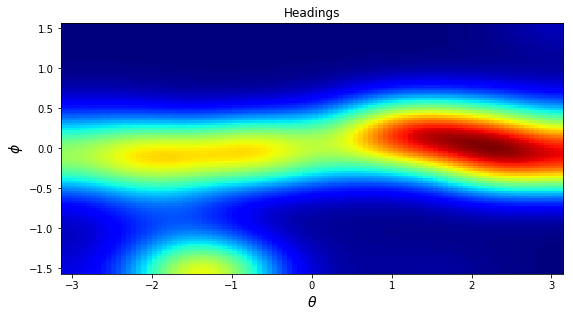

0 ---> 10.956249564234742


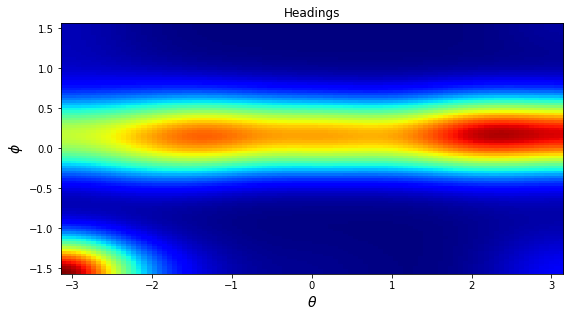

1 ---> 10.87640613574953


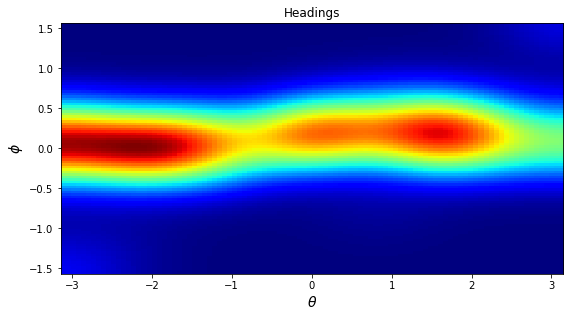

1 ---> 11.008436015430949


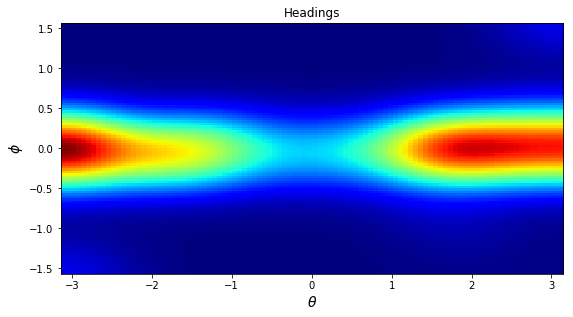

0 ---> 10.872046515141628


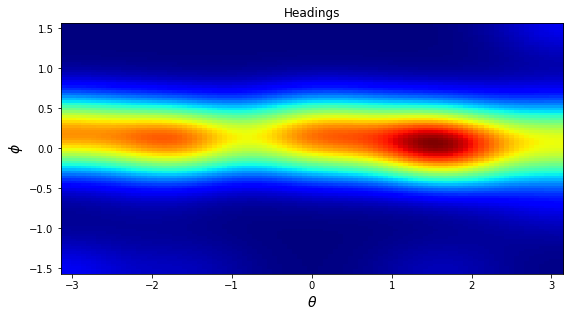

1 ---> 10.614060770354154


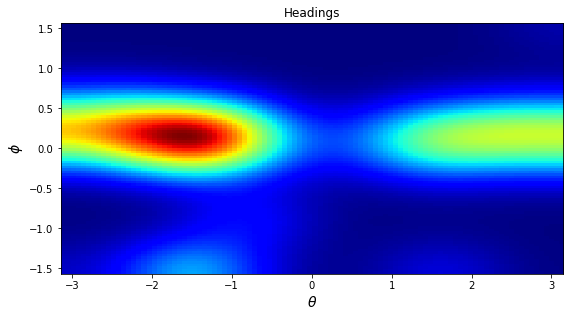

2 ---> 10.696872066579106


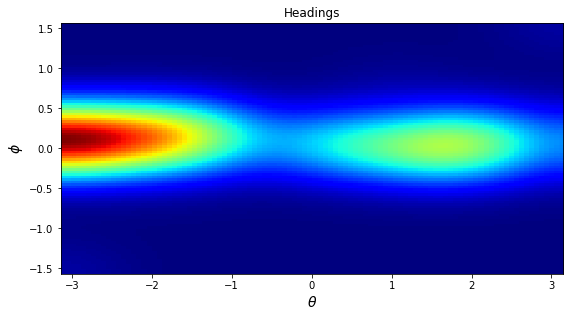

2 ---> 11.031929571322811


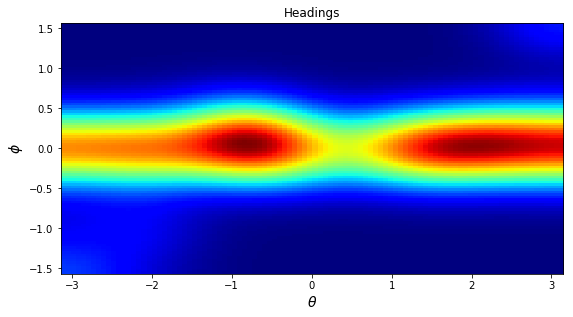

2 ---> 10.76301185151751


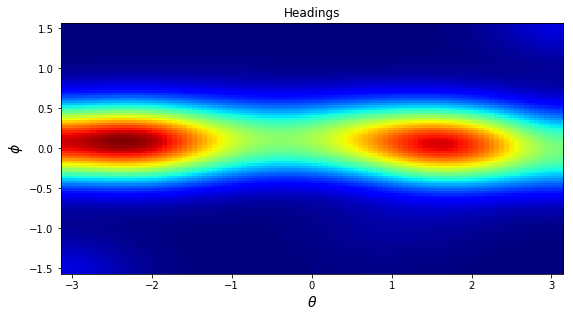

1 ---> 10.779880419589382


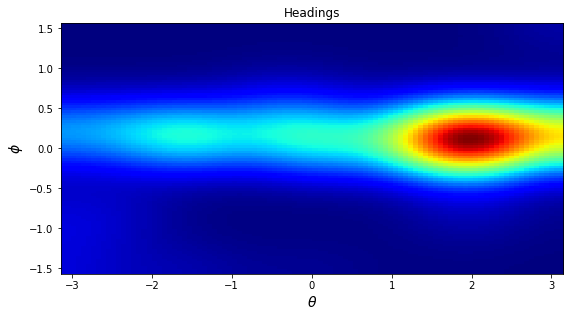

0 ---> 10.837958054080993


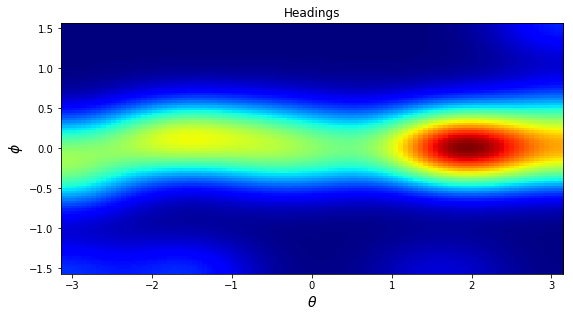

2 ---> 10.996098927793666


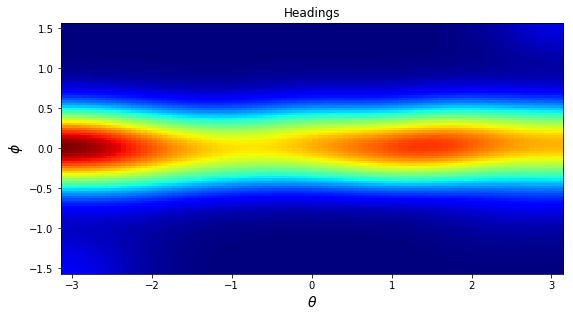

1 ---> 11.06832624318387


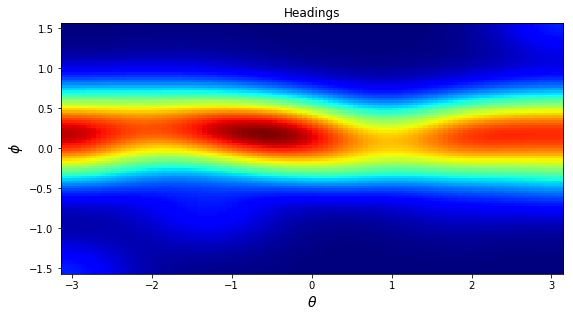

0 ---> 11.068594980745859


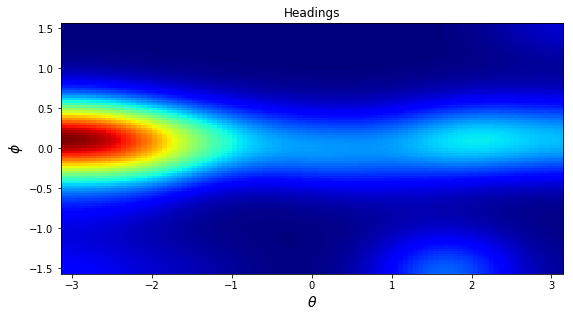

2 ---> 11.0980519009393


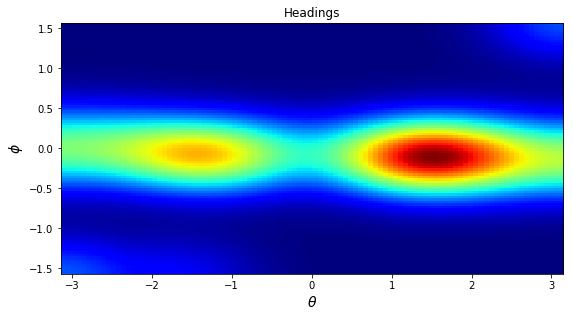

1 ---> 10.836721536738233


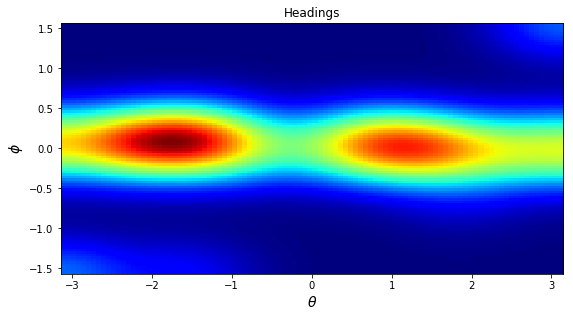

2 ---> 11.051495554800665


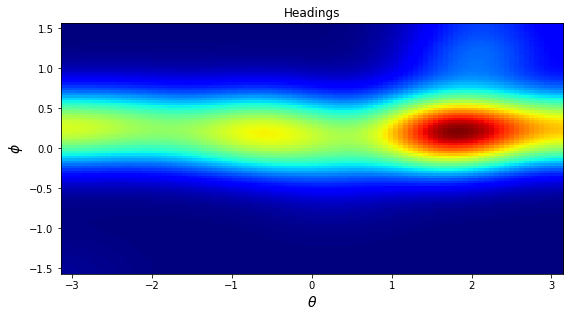

2 ---> 11.04371554239476


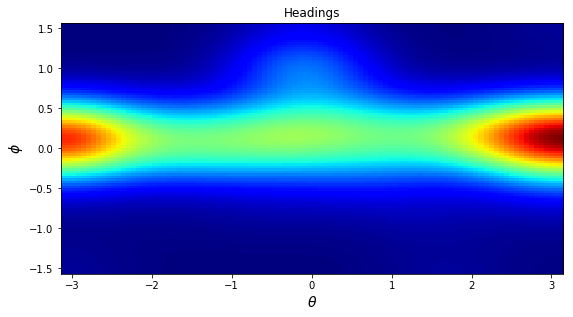

In [127]:
types = []
Hs = []

for h, name in zip(headings_csv, headings):
    h = h.dropna(axis=0)
    split_idx = h[h.progress == 0].index[-1]

    exp_type = name.replace('_old', '').split('_')[-1].replace('.csv', '')
    H = calculate_entropy(h[split_idx:].x, h[split_idx:].z, h[split_idx:].y)
    print(exp_type, '--->', H)
    
    t, p = cart_to_spherical(h.x, h.z, h.y)
    theta2 = (t+np.pi/2+np.pi/2) % np.pi - np.pi/2
    
    theta2 = theta2.append(pd.Series([-np.pi/2, np.pi/2]))
    phi = p.append(pd.Series([-np.pi, np.pi]))
    
    img, extent = myplot(phi, theta2, 10, bins=100)
    plt.figure(figsize=(9, 5))
    plt.title('Headings')
    plt.xlabel(r'$\theta$', fontsize=14)
    plt.ylabel(r'$\phi$', fontsize=14)
    plt.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
    plt.show()
    
    types.append(float(exp_type))
    Hs.append(H)

In [128]:
entropies = pd.DataFrame(np.array([types, Hs]).T,
             columns=['group', 'H'])

In [129]:
entropies.groupby('group')['H'].mean()

group
0.0    11.037677
1.0    10.863972
2.0    10.966865
Name: H, dtype: float64

In [130]:
entropies.groupby('group')['H'].std()

group
0.0    0.154398
1.0    0.163129
2.0    0.149936
Name: H, dtype: float64

In [131]:
g1 = entropies[entropies['group']==0]['H'].values
g2 = entropies[entropies['group']==1]['H'].values
g3 = entropies[entropies['group']==2]['H'].values

In [132]:
from scipy.stats import f_oneway

In [133]:
f_oneway(g1, g2, g3)

F_onewayResult(statistic=2.033092115458005, pvalue=0.1599216963377709)

In [134]:
entropies.groupby('group')['H'].count()

group
0.0    7
1.0    6
2.0    8
Name: H, dtype: int64

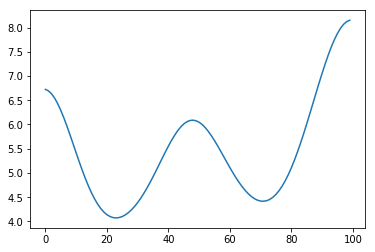

In [135]:
plt.plot(img.sum(axis=0))

2 ---> 11.053743486861343


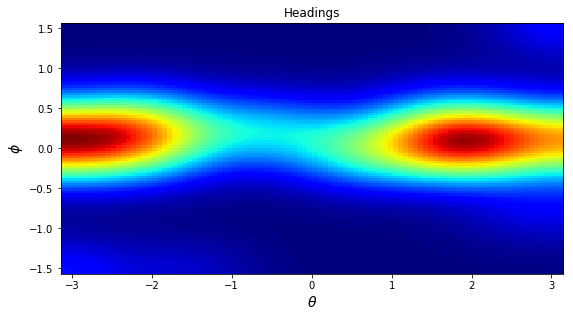

0 ---> 11.093781055381527


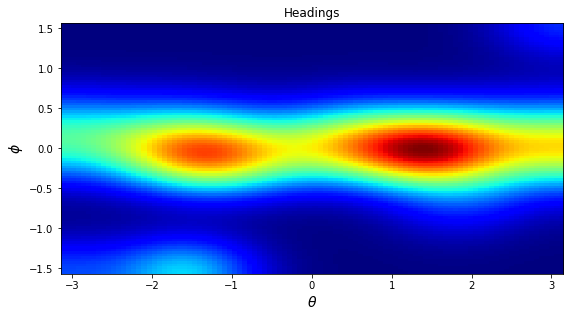

0 ---> 11.229111246021585


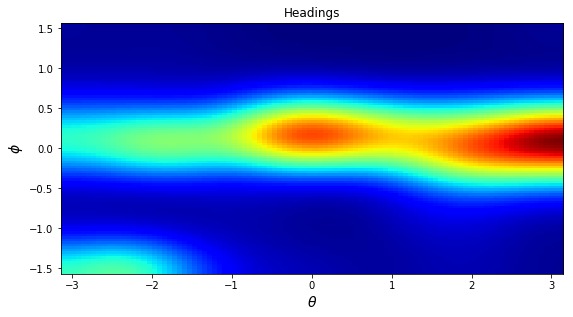

0 ---> 11.205994900282475


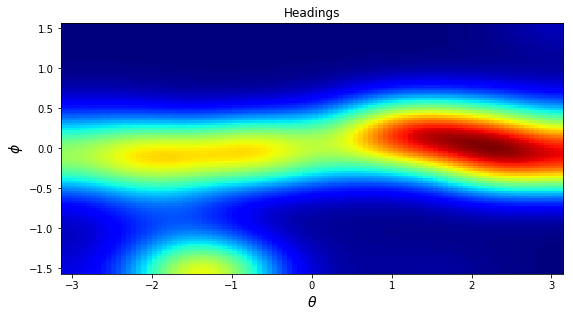

0 ---> 10.956249564234742


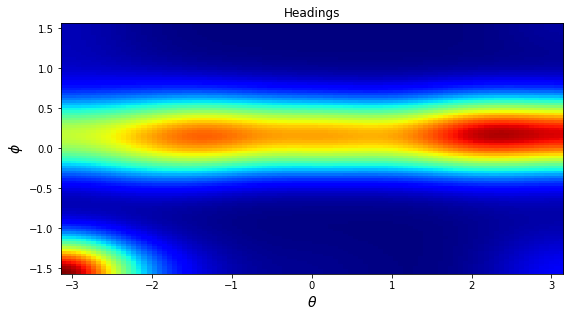

1 ---> 10.87640613574953


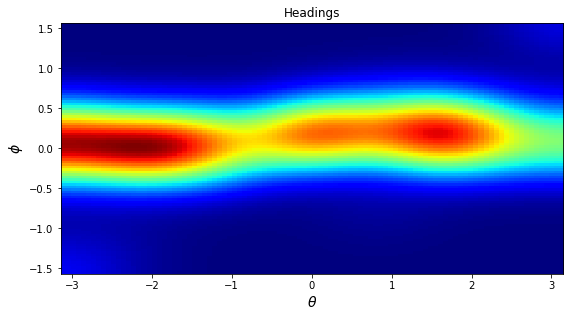

1 ---> 11.008436015430949


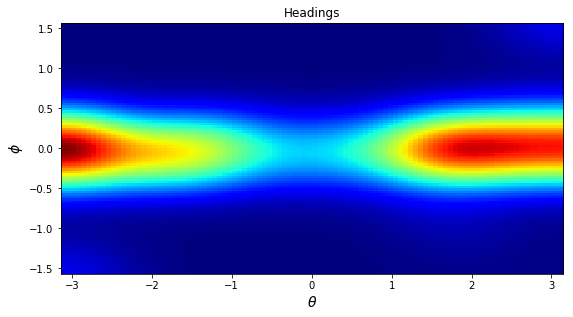

0 ---> 10.872046515141628


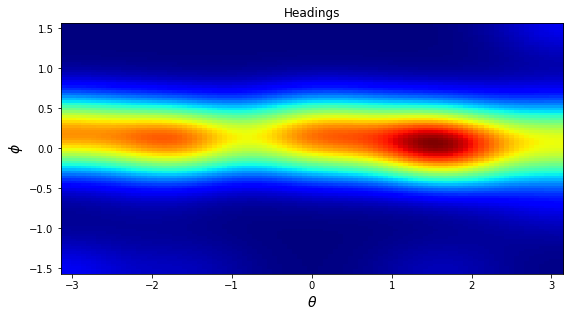

1 ---> 10.614060770354154


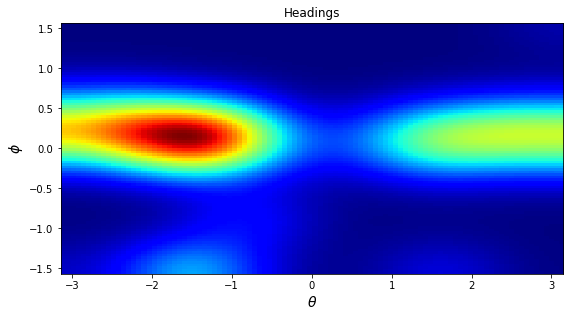

2 ---> 10.696872066579106


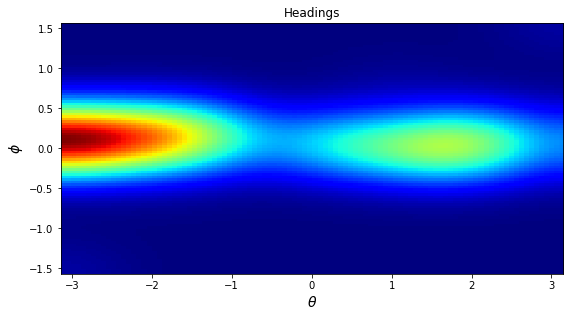

2 ---> 11.031929571322811


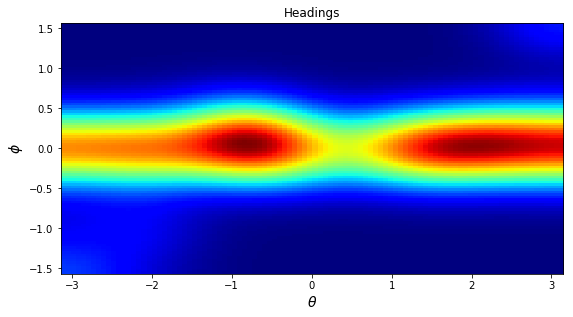

2 ---> 10.76301185151751


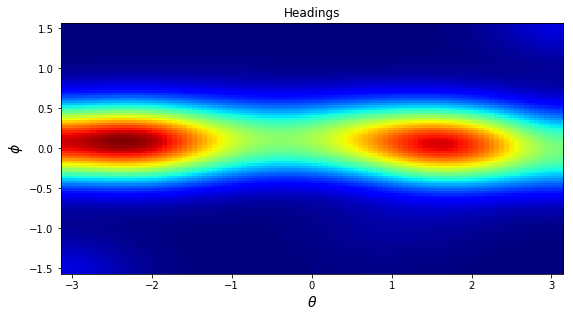

1 ---> 10.779880419589382


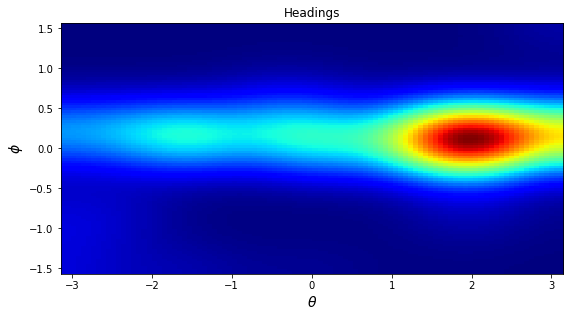

0 ---> 10.837958054080993


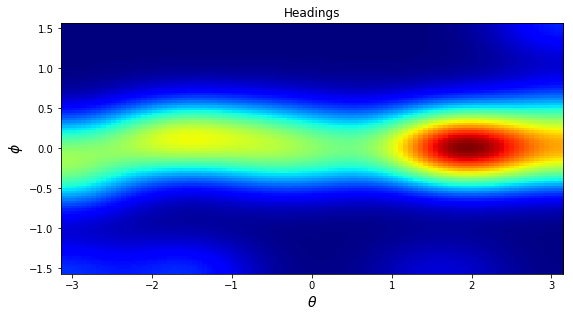

2 ---> 10.996098927793666


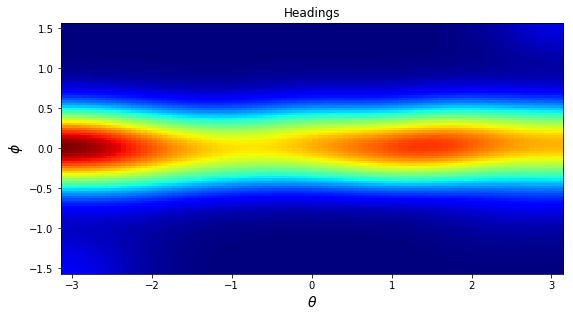

1 ---> 11.06832624318387


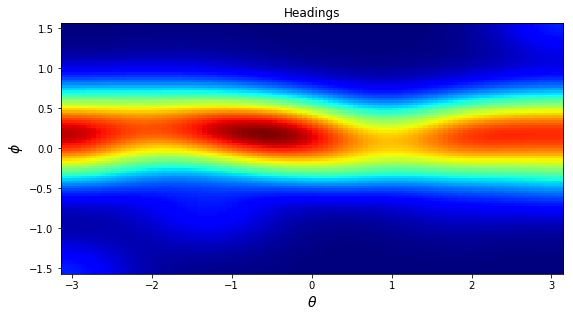

0 ---> 11.068594980745859


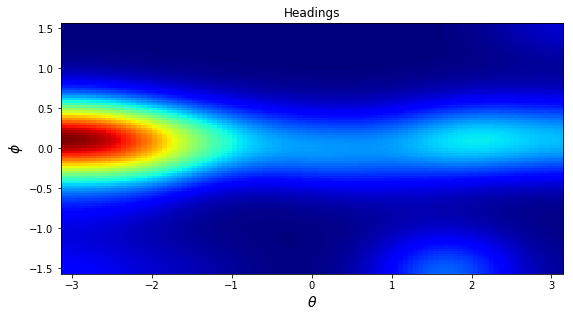

2 ---> 11.0980519009393


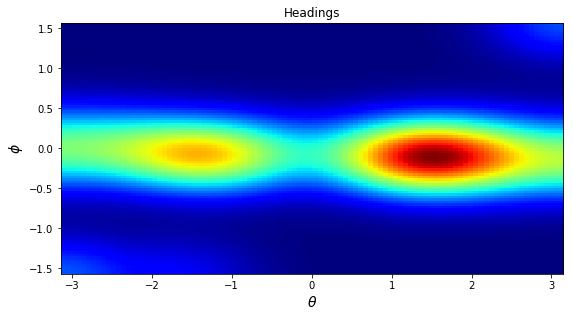

1 ---> 10.836721536738233


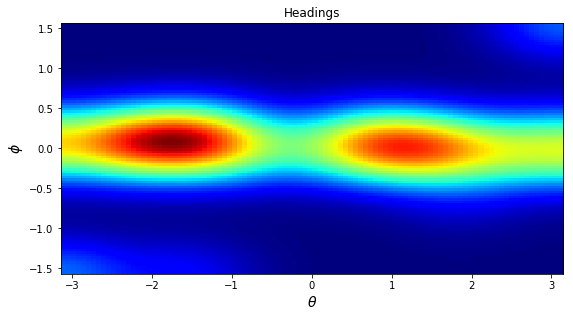

2 ---> 11.051495554800665


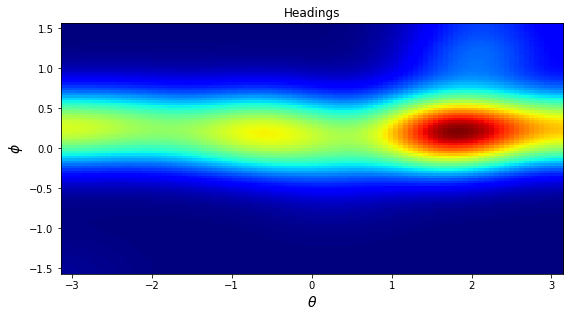

2 ---> 11.04371554239476


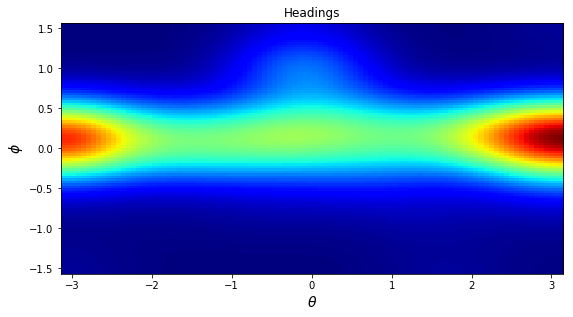

In [136]:
types = []
Hs = []

for h, name in zip(headings_csv, headings):
    h = h.dropna(axis=0)
    split_idx = h[h.progress == 0].index[-1]

    exp_type = name.replace('_old', '').split('_')[-1].replace('.csv', '')
    H = calculate_entropy(h[split_idx:].x, h[split_idx:].z, h[split_idx:].y)
    print(exp_type, '--->', H)
    
    t, p = cart_to_spherical(h.x, h.z, h.y)
    theta2 = (t+np.pi/2+np.pi/2) % np.pi - np.pi/2
    
    theta2 = theta2.append(pd.Series([-np.pi/2, np.pi/2]))
    phi = p.append(pd.Series([-np.pi, np.pi]))
    
    img, extent = myplot(phi, theta2, 10, bins=100)
    plt.figure(figsize=(9, 5))
    plt.title('Headings')
    plt.xlabel(r'$\theta$', fontsize=14)
    plt.ylabel(r'$\phi$', fontsize=14)
    plt.imshow(img, extent=extent, origin='lower', cmap=cm.jet)
    plt.show()
    
    types.append(float(exp_type))
    Hs.append(stats.entropy(img.sum(axis=0)))

In [137]:
entropies = pd.DataFrame(np.array([types, Hs]).T,
             columns=['group', 'H'])

In [138]:
entropies.groupby('group')['H'].mean()

group
0.0    4.575964
1.0    4.560907
2.0    4.573369
Name: H, dtype: float64

In [139]:
entropies.groupby('group')['H'].std()

group
0.0    0.039384
1.0    0.035756
2.0    0.023243
Name: H, dtype: float64